# Reading Data, Pandas

There are various file formats, how do we make a sense of them all?

* There are archive/compression formats such as .zip, .rar, .7z, .tar those hold other files.
* There are text formats such as .txt, .csv, .json, .tsv - those can be read by humans in a text editor
* There are binary formats such as .exe, .jpg, .png - those are not human readable

### Reading text files

In this section we will read a simple text file.

In [ ]:
filename = "alice_wonderland.txt"

In [ ]:
# open the file in current directory for reading
file_1 = open(filename)

# read contents of the file
data = file_1.read()

# close the file
file_1.close()

In [ ]:
# a better way (automatically closing the open file)

with open(filename) as file_1:   
    data = file_1.read()

### Google Colab

Note: The above action (reading a local file) will fail if you execute it in Google Colab. 

We can open it from a remote web location (from Github) instead. Let's use the `requests` library:

In [ ]:
import requests

url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/notebooks/" + filename

response = requests.get(url)
data = response.text

### Let's continue


In [ ]:
# print the first 100 characters of the file
print(data[:100])

In [ ]:
# split text into tokens (words)
words = data.split()

In [ ]:
# count the number of tokens in text

print(len(words))

In [ ]:
# print the first 50 tokens
print(words[:50])

### Counting word frequency

Here we will use Python's Counter object (from Python collections library) to determine word frequency of the text. 

https://docs.python.org/3/library/collections.html#collections.Counter

In [ ]:
from collections import Counter

In [ ]:
c = Counter(words)

In [ ]:
# print the 20 most common words (tokens)
print(c.most_common(20))

In [ ]:
# a nicer way of printing counter results using a *for* cycle

for token, count in c.most_common(20):
    print(f"{token}: {count}")


Notice how words may appear in both lowercase ("the") and uppercase ("The"). You may want to normalize the text by converting it all to lowercase and do other clean-up steps. 

### Reading TSV files

Corpora that we could work with are located in archived TSV (Tab-separated-values) files:
https://github.com/CaptSolo/BSSDH_2023_beginners/tree/main/corpora

These files consist of rows (records) that contain one or more values separated by "Tab" characters.

We will use Pandas library to read a TSV file that contains a smaller version of the "lv_old_newspapers.zip" corpus: https://github.com/CaptSolo/BSSDH_2023_beginners/blob/main/corpora/lv_old_newspapers_5k.tsv

You may also use a TSV file for an English newspaper corpus (with slightly different column names): https://github.com/CaptSolo/BSSDH_2023_beginners/blob/main/corpora/en_old_newspapers_5k.tsv

In [3]:
import pandas

# common alternative 
# import pandas as pd
# this would let you save 4 characters each time you need some pandas functionality you would write pd instead of pandas

In [ ]:
# if you downloaded and unarchived the whole Github repository 
# this is where you will find the lv_old_newspapers_5k.tsv file:

filename = "../corpora/lv_old_newspapers_5k.tsv"

In [ ]:
# read the tab-separated file ("sep" parameter tells Pandas that values in the file
# are separated with the "tab" character.

df_1 = pandas.read_csv(filename, sep="\t") # instead of df_1 we could use another name for our variable

#### Google Colab

Note: The above action (reading a local file) will fail if you execute it in Google Colab.

We have two different approaches then:

1. Upload file to Google Colab (remember this is temporary). Read it just like you would on a local computer. 

2. Download file(s) from web address, instead of file path we will use its web addrss (URL)

In [ ]:
# Approach 1
# Assuming file has been uploaded it will be found in current directory

file_path = "lv_old_newspapers_5k.tsv"

df_1 = pandas.read_csv(file_path, sep="\t")

# print the first lines of the file
df_1.head()

In [108]:
# Approach 2 reading from a web address 
url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/lv_old_newspapers_5k.tsv"

# ... or you could use the English corpus instead:
# url = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv"

df_2 = pandas.read_csv(url, sep="\t")

# print the first lines of the file
df_2.head()

,Language,Source,Date,Text
0,Latvian,rekurzeme.lv,2008/09/04,"""Viņa pirmsnāves zīmītē bija rakstīts vienīgi ..."
1,Latvian,diena.lv,2012/01/10,info@zurnalistiem.lv
2,Latvian,bauskasdzive.lv,2007/12/27,"Bhuto, kas Pakistānā no trimdas atgriezās tika..."
3,Latvian,bauskasdzive.lv,2008/10/08,Plkst. 4.00 Samoilovs / Pļaviņš (pludmales vol...
4,Latvian,diena.lv,2011/10/05,"CVK bija vērsusies Skaburska, lūdzot izskaidro..."


In [109]:
# get the basic statistics of the dataset
df_2.describe()

,Language,Source,Date,Text
count,4999,4999,4999,4999
unique,1,13,1428,4999
top,Latvian,diena.lv,2011/12/23,"""Viņa pirmsnāves zīmītē bija rakstīts vienīgi ..."
freq,4999,634,24,1


### Let's continue working with the dataframe (containing a text corpus)

In [ ]:
# the size of the corpus:
print(len(df_1))

In [ ]:
# select the Text column, show the first 10 entries

df_1["Text"][:10]

In [ ]:
# we can get ALL of the text in one big string from a pandas column

list_of_rows = list(df_1.Text)
len(list_of_rows)

In [ ]:
# let's see what we have in first 3 rows
list_of_rows[:3]

In [ ]:
all_text = "\n".join(list_of_rows) # we can join all rows into one big string 
# separating each document with a newline, but you could choose something else to join with

# "\n" means a newline symbol

all_text[:250]

### Reading archived files

Pandas can also read archived CSV and TSV files.

In [ ]:
# filename_2 = "../corpora/lv_old_newspapers.zip"

## read the archived, tab-separated file ("compression" parameter tells
## Pandas that this is a ZIP archived file).

# df_2 = pandas.read_csv(filename_2, sep="\t", compression="zip")

Note: The above action (reading a local file) that is commented out will fail if you execute it in Google Colab.

We will use downloading from a remote web location instead (a Github repository in this case):

In [4]:
url_2 = "https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/lv_old_newspapers.zip"

df_2 = pandas.read_csv(url_2, sep="\t", compression="zip")

In [5]:
# the size of the corpus:

print(len(df_2))

319428


In [6]:
# show the last 10 entries

df_2.tail(10)

,Language,Source,Date,Text
319418,Latvian,bdaugava.lv,2010/01/16,Ceturtdien no rajona padomes ēkas tika svinīgi...
319419,Latvian,nra.lv,2011/12/21,"AFP vēsta, ka naktī uz otrdienu, jau piekto na..."
319420,Latvian,db.lv,2011/12/02,TOP 500 ir vienīgais ikgadējais izdevums Latvi...
319421,Latvian,diena.lv,2009/12/21,ka pati visu mūžu bijusi saistīta ar šo jomu. ...
319422,Latvian,la.lv,2011/12/08,"Prakse liecina, ka tādos gadījumos tiesu izpil..."
319423,Latvian,ziemellatvija.lv,2008/01/30,Beigu beigās I. Klempere kopā ar dēlu mājās de...
319424,Latvian,db.lv,2012/01/03,"Vienkāršā valodā tas nozīmē, ka investori par ..."
319425,Latvian,la.lv,2011/08/27,– Visi mūsu projekti ir notikuši sadarbībā ar ...
319426,Latvian,ziemellatvija.lv,2007/03/12,"Pole atzina, ka par šo ziņojumu VM saņēmusi li..."
319427,Latvian,bauskasdzive.lv,2011/07/07,"Trešdienas, 6. jūlija, vakarā projekta vadītāj..."


In [7]:
# Sorting the dataset
df_2.sort_values(by=["Date"])

# Minimum value
df_2.min()

Language                                              Latvian
Source                                        bauskasdzive.lv
Date                                               2005/04/27
Text        ! Apsēdies, atpūties, centies noorientēties ap...
dtype: object

In [8]:
# Maximum value
df_2.max()

Language                                              Latvian
Source                                                  zz.lv
Date                                               2012/01/14
Text        ♦ virsseržants Pēteris Tetērins, jaunākais ins...
dtype: object

##  Reading other formats

Pandas supports a wide variety of file formats

Full list of formats is available here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

For example to read Excel files you would use my_dataframe = pandas.read_excel(filepath)
where filepath would be a string with file location or web address

## Task - read data into a dataframe from file

We have 4 different corpora for you to use.

Web addresses:

* English - https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/en_old_newspapers_5k.tsv
* Estonian - https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/ee_old_newspapers.zip
* Latvian - https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/lv_old_newspapers.zip
* Ukrainian - https://raw.githubusercontent.com/CaptSolo/BSSDH_2023_beginners/main/corpora/ua_old_newspapers.zip

Load one of them in a dataframe. Check the length, shape, sort them, see the first 15 entries and the last 20 entries.

# Visualizing data


In [9]:
# https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

from nltk import FreqDist

all_text = "\n".join(df_2["Text"]).split()
all_fdist = FreqDist(all_text).most_common(20)

In [10]:
all_fdist

[('un', 343847),
 ('ir', 196132),
 ('ka', 140640),
 ('ar', 133002),
 ('par', 131573),
 ('arī', 108373),
 ('no', 105145),
 ('-', 76014),
 ('kas', 66805),
 ('kā', 64564),
 ('uz', 64063),
 ('bet', 53753),
 ('bija', 44710),
 ('vai', 44007),
 ('nav', 43423),
 ('–', 41918),
 ('gan', 37674),
 ('līdz', 36964),
 ('jau', 36694),
 ('to', 35795)]

In [11]:
# converting data to Pandas series
all_fdist = pandas.Series(dict(all_fdist))

In [12]:
all_fdist

un      343847
ir      196132
ka      140640
ar      133002
par     131573
arī     108373
no      105145
-        76014
kas      66805
kā       64564
uz       64063
bet      53753
bija     44710
vai      44007
nav      43423
–        41918
gan      37674
līdz     36964
jau      36694
to       35795
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
## setting up a visualization (figure size)
#fig, ax = plt.subplots(figsize=(10,10))

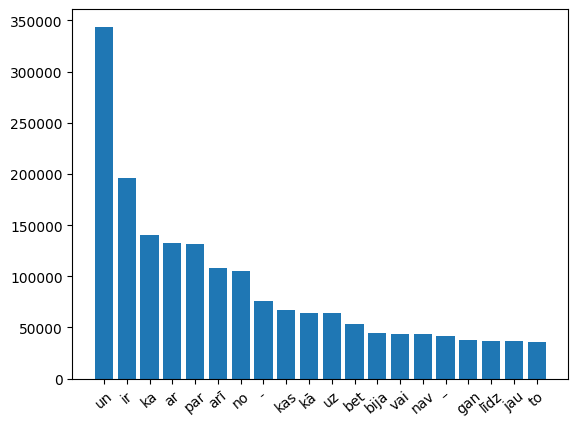

In [26]:
## Matplotlib plot using Pandas attributes + xtick rotation for ease of viewing

#all_plot = plt.bar(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot = plt.bar(all_fdist.index, all_fdist.values)
plt.xticks(rotation=40);

In [37]:
# stopword removal

# we could remove stopwords using NLTK's stopword list
# but that won't work for Latvian

# import nltk

# stopwords = nltk.corpus.stopwords.words('english')

# let's use an existing Latvian stopword list from Github
import requests

stop_url = "https://raw.githubusercontent.com/Xangis/extra-stopwords/master/latvian"
res = requests.get(stop_url)

stopwords = res.text.split()

stopword_set = set(stopwords)
print(stopwords[:10])

['aiz', 'ap', 'ar', 'apakš', 'ārpus', 'augšpus', 'bez', 'caur', 'dēļ', 'gar']


In [48]:
# removing stopwords
all_text_stopped = [word for word in all_text if word not in stopword_set]

# removing special characters
spec_chars = ['-', '–', '—']
all_text_stopped = [word for word in all_text_stopped if word not in spec_chars]

all_text_stopped[:6]

['"Viņa', 'pirmsnāves', 'zīmītē', 'rakstīts', 'vienīgi', 'smēķēšanas']

In [59]:
# let's draw freq distribution again

all_fdist_stopped = FreqDist(all_text_stopped).most_common(20)
all_fdist_stopped = pandas.Series(dict(all_fdist_stopped))

for line in all_fdist_stopped.keys():
    print(line, ":\t", all_fdist_stopped[line])

kas :	 66805
nav :	 43423
to :	 35795
Latvijas :	 34333
tas :	 24280
ko :	 22641
valsts :	 21924
gada :	 21831
vēl :	 21245
kad :	 18995
laikā :	 17275
savu :	 17096
ļoti :	 15968
kur :	 15443
varētu :	 14747
šo :	 14635
vairāk :	 14379
tās :	 14320
darba :	 13734
būtu :	 13637


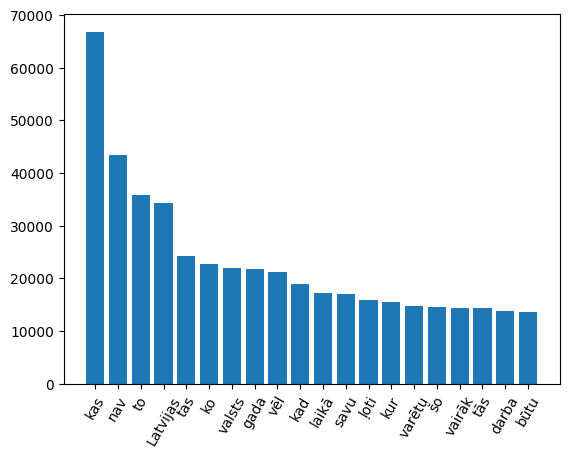

In [61]:
all_plot = plt.bar(all_fdist_stopped.index, all_fdist_stopped.values)
plt.xticks(rotation=60)

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


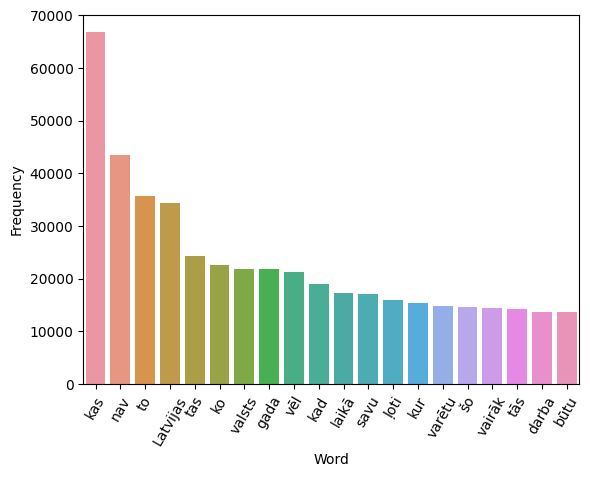

In [105]:
# Visualization using Searborn library

data = FreqDist(all_text_stopped).most_common(20)
data = pandas.DataFrame(data, columns = ["Word","Frequency"])

ax = sns.barplot(data, x="Word", y="Frequency")

ax = ax.set_xticklabels(data["Word"], rotation=60)

In [ ]:
# draw a horizontal bar chart in seaborn


In [107]:
ToDo:

* create a separate notebook for matplotlib
* add collocations
* add WordCloud


SyntaxError: invalid syntax (636684527.py, line 1)